1.Train a network with three different inputs and initial weight vector with Perceptron learning rule using python.

In [ ]:
import numpy as np

def temp_func(a):
    # Define the temporary function based on the sign of a
    if a > 0:
        return 1
    elif a < 0:
        return -1
    else:
        return 0

def perceptron_learning_rule(inputs, weights, c, d_values):
    updated_weights = weights.copy()
    for inp, d in zip(inputs, d_values):
        inp = np.array(inp)
        # Calculate the dot product of input and transposed weights
        dot_product = np.dot(inp, updated_weights)
        # Calculate the temporary function value
        temp = temp_func(dot_product)
        # Update weights
        updated_weights += c * (d - temp) * inp
    return updated_weights

# Initial weights
weights = np.array([1, -1, 0, 0.5])

# Inputs
inputs = [
    [1, -2, 0, -1],
    [0, 1.5, -0.5, -1],
    [-1, 1, 0.5, -1]
]

# Constants
c = 0.1


# Apply Perceptron learning rule
updated_weights = perceptron_learning_rule(inputs, weights, c, d_values)

print("Updated Weights:", updated_weights)

Updated Weights: [ 0.6 -0.4  0.1  0.5]


2. Train a network with three different inputs and initial weight vector with Hebbian learning rule using python.

In [ ]:
import numpy as np

def hebbian_learning_rule(inputs, weights):
    updated_weights = weights.copy()
    for inp in inputs:
        inp = np.array(inp)
        # Calculate the dot product of input and transposed weights
        dot_product = np.dot(inp, updated_weights)

        # If dot product is positive, add the weights to the input vector
        if dot_product > 0:
            updated_weights += inp
        # If dot product is negative, subtract the weights from the input vector
        elif dot_product < 0:
            updated_weights -= inp
    return updated_weights

# Initial weights
weights = np.array([1, -1, 0, 0.5])

# Inputs
inputs = [
    [1, -2, 1.5, 0],
    [1, -0.5, -2, -1.5],
    [0, 1, -1, 1.5]
]

# Apply Hebbian learning rule
updated_weights = hebbian_learning_rule(inputs, weights)

print("Updated Weights:", updated_weights)


Updated Weights: [ 1.  -3.5  4.5  0.5]



3. Train a network with three different inputs and initial weight vector with Delta learning rule using python. Assume λ = 1 and c=0.1

In [ ]:
import numpy as np

def delta_learning_rule(inputs, weights, lambda_value, c, output):
    updated_weights = weights.copy()
    for inp, di in zip(inputs, output):
        inp = np.array(inp)
        # Calculate the dot product of input and transposed weights
        dot_product = np.dot(inp, updated_weights)

        # Apply activation function
        fnet = (2 / (1 + np.exp(-lambda_value * dot_product))) - 1
        f_net = (1 - np.square(fnet)) / 2

        # Update weights using the delta learning rule
        updated_weights = c * (di - fnet) * f_net * inp + updated_weights

    return updated_weights

# Initial weights
weights = np.array([1, -1, 0, 0.5])

# Inputs
inputs = [
    [1, -2, 0, -1],
    [0, 2, -0.5, -2],
    [-1, 1, 0.5, -1]
]
output = [-1, -1, 1]
lambda_value = 1
c = 0.1

# Apply delta learning rule
updated_weights = delta_learning_rule(inputs, weights, lambda_value, c, output)
print("Updated Weights:", updated_weights)

Updated Weights: [ 0.94719318 -0.9231658   0.01391798  0.50090873]


4)Realization of logical AND, OR function using Perceptron learning rule.

AND GATE:

In [ ]:
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
  if v >= 0:
    return 1
  else:
    return 0

# design Perceptron Model
def perceptronModel(x, w, b):
 v = np.dot(w, x) + b
 y = unitStep(v)
 return y

# AND Logic Function
# w1 = 1, w2 = 1, b = -1.5
def AND_logicFunction(x):
 w = np.array([1, 1])
 b = -1.5
 return perceptronModel(x, w, b)

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("AND({}, {}) = {}".format(0, 1, AND_logicFunction(test1)))
print("AND({}, {}) = {}".format(1, 1, AND_logicFunction(test2)))
print("AND({}, {}) = {}".format(0, 0, AND_logicFunction(test3)))
print("AND({}, {}) = {}".format(1, 0, AND_logicFunction(test4)))

AND(0, 1) = 0
AND(1, 1) = 1
AND(0, 0) = 0
AND(1, 0) = 0


OR GATE:

In [ ]:
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
   if v >= 0:
    return 1
   else:
    return 0

# design Perceptron Model
def perceptronModel(x, w, b):
 v = np.dot(w, x) + b
 y = unitStep(v)
 return y

# OR Logic Function
# w1 = 1, w2 = 1, b = -0.5
def OR_logicFunction(x):
 w = np.array([1, 1])
 b = -0.5
 return perceptronModel(x, w, b)

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("OR({}, {}) = {}".format(0, 1, OR_logicFunction(test1)))
print("OR({}, {}) = {}".format(1, 1, OR_logicFunction(test2)))
print("OR({}, {}) = {}".format(0, 0, OR_logicFunction(test3)))
print("OR({}, {}) = {}".format(1, 0, OR_logicFunction(test4)))

OR(0, 1) = 1
OR(1, 1) = 1
OR(0, 0) = 0
OR(1, 0) = 1


5. Classify handwritten digits using Tensor flow.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocessing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 4: Building the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images from 28x28 to a 1D array
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes (digits 0-9)
])

# Step 5: Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Training the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
model.save('model.h5')


1/1 [==============================] - 0s 100ms/step


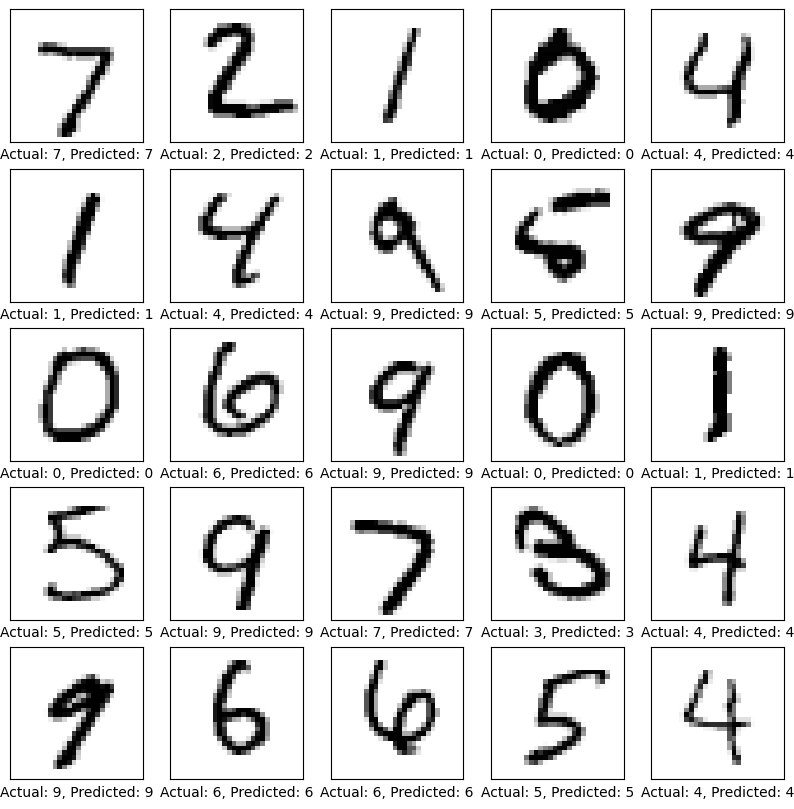

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_test = x_test / 255.0

# Load the trained model (assuming model is already trained)
# Replace 'model.h5' with the path to your trained model file
model = tf.keras.models.load_model('model.h5')

# Make predictions for the first 25 sample inputs
predictions = model.predict(x_test[:25])

# Plot sample inputs along with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {y_test[i]}, Predicted: {tf.argmax(predictions[i])}')
plt.show()


7  & 8.  Perform convolution and pooling operation on an input image and display both input, output images



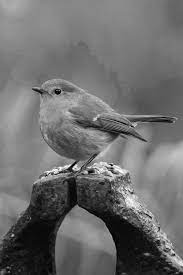

Size of original image: (275, 183)


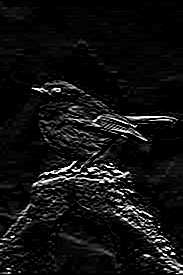

Size of convolved image: (275, 183)


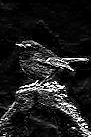

Size of pooled image: (137, 91)
Size of flattened image: (12467,)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = './bird.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a simple 3x3 convolutional filter/kernel
kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

# Perform convolution using OpenCV's filter2D function
convolved_image = cv2.filter2D(image, -1, kernel)

# Define a 2x2 max pooling function
def max_pooling(image, pool_size=(2, 2)):
    rows, cols = image.shape
    pooled_image = np.zeros((rows // pool_size[0], cols // pool_size[1]), dtype=np.uint8)
    for i in range(0, rows - pool_size[0] + 1, pool_size[0]):
        for j in range(0, cols - pool_size[1] + 1, pool_size[1]):
            pooled_image[i // pool_size[0], j // pool_size[1]] = np.max(image[i:i+pool_size[0], j:j+pool_size[1]])
    return pooled_image

# Perform max pooling
pooled_image = max_pooling(convolved_image)

# Flatten the pooled image
flattened_image = pooled_image.flatten()

# Display the original, convolved, pooled, and flattened images
cv2_imshow(image)
print("Size of original image:", image.shape)

cv2_imshow(convolved_image)
print("Size of convolved image:", convolved_image.shape)

cv2_imshow(pooled_image)
print("Size of pooled image:", pooled_image.shape)

print("Size of flattened image:", flattened_image.shape)


9 &10 .Max Pooling & Average Pooling

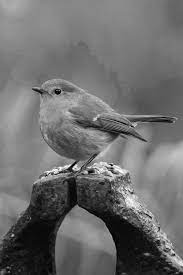

Size of original Image (275, 183)


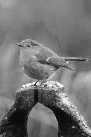

Size of pooled Image (137, 91)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = './bird.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a 2x2 max pooling function  np.max/np.mean
def max_pooling(image, pool_size=(2, 2)):
    rows, cols = image.shape
    pooled_image = np.zeros((rows // pool_size[0], cols // pool_size[1]), dtype=np.uint8)
    for i in range(0, rows - pool_size[0] + 1, pool_size[0]):
        for j in range(0, cols - pool_size[1] + 1, pool_size[1]):
            pooled_image[i // pool_size[0], j // pool_size[1]] = np.max(image[i:i+pool_size[0], j:j+pool_size[1]])
    return pooled_image

# Perform max pooling
pooled_image = max_pooling(image)

# Display the original, convolved, and flattened images
cv2_imshow(image)
print("Size of original Image",image.shape)

cv2_imshow(pooled_image)  #  displaying pooled image
print("Size of pooled Image",pooled_image.shape)